# ATOC 5860: Homework 1

Written responses

### Jonah Shaw, 2022/01/24

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

## 1. Basic Statistics

__a) Bayes Theorem.  Assume background rates of COVID are 90% negative, 10% positive AND COVID tests are accurate 80% of the time, but fail 20% of the time. Your friend goes and gets a COVID test.  Your friend test negative. What is the probability that your friend is actually negative? Explain to your friend how you are using Bayes theorem to inform your thinking.  Hint: Review Lecture #1 and the 1.2.2.2 of the Barnes Notes. (10 points)__

Bayes Theorem states:

$$ P(A | B) = \frac{P(B | A)P(A)}{P(B)}, $$

where the probability of $B$ occurring $P(B)$ can be written as a sum over all possibilities of $A$:  

$$ P(B) = \sum_i P(B | A_i) $$

Let $C$ indicate that you are actually infected with COVID-19 ($\tilde{C}$ indicates you do not have COVID).
Similarly, let $p$ indicate that you test positive for COVID-19 ($\tilde{p}$ indicates you test negative). From the prompt, we know that:
- $P(C) = 0.10$ (background positive COVID rate)
- $P(\tilde{C}) = 0.90$
- $P(p|C) = 0.80$ (true positive)
- $P(\tilde{p}|C) = 0.20$ (false negative)
- $P(\tilde{p}|\tilde{C}) = 0.80$ (true negative)
- $P(p|\tilde{C}) = 0.20$ (false positive)


Applying Bayes' Theorem, we can write the probability of being negative given a negative test and knowing the background rate of infect $P(\tilde{C},\tilde{p})$ as  

$$ P(\tilde{C},\tilde{p}) = \frac{P(\tilde{p}|\tilde{C})P(\tilde{C})}{P(\tilde{p}|C) P(C) + P(\tilde{p}|\tilde{C})P(\tilde{C})} = \frac{(0.80)(0.90)}{(0.20)(0.10) + (0.80)(0.90)} \approx 98\% $$

My Explanation:  
The test error rates depend on whether you are actually positive or negative. Since we know the background rate of COVID, we use this prior to get a better estimate of the testing errors.

__b)	Explain how to test whether a sample mean is significantly different than zero at the 95% confidence level and the 99% confidence level. State each of the 5 steps in hypothesis testing that you are using.  Contrast your approach for a sample with 15 independent observations (N=15) and a sample 1000 independent observations (N=1000). (15 points)__

I would use hypothesis testing to test if a sample mean is statistically different from zero. This requires knowing the standard deviation of the sample, the sample mean, and the size of the sample.

The 5 steps in hypothesis testing are:

1. State the significance level ($\alpha$) (in this case $\alpha = 0.05,0.01$).  

2. State the null hypothesis. ($\mu = 0$, i.e. the sample mean is zero).

3. State the statistic used and its assumptions ($N=15 \rightarrow$ t-stat, $N=10^3 \rightarrow$ z-stat).

4. State the critical region. We have no prior, so we used a two-tailed test.

5. Evaluate the statistic and state the solution.

With 15 observations, we would use the t-statistic, which produces a wider distribution than the standard z-statistic for small samples. With 1000 observations, we can confidently use the z-statistic.

__c)	Design your own homework problem to compare two sample means using data of your own choice.  In other words, test whether two sample means are statistically different. Follow all five steps of hypothesis testing.  Hint: See page 26 of Barnes notes for an example. (15 points)__

You are a farmer raising a small flock of chickens. Every year, you get new chickens and weigh them before the end of the season. The chickens this year seem abnormally large and you are interested in knowing if there is a statistically significant (at 95% confidence) increase over the previous year.

This year: 22 chickens with an average weight of 4.2lbs and a standard deviation of 1.2lbs.
Last year: 27 chicken with an average weight of 3.1lbs and a standard deviation of 1.0lbs.

1. $\alpha = 0.05$
2. Null Hypothesis $H_0: \mu_1 = \mu_2$, $H_1: \mu_1 \neq \mu_2$
3. $N < 30$, so we use the t-statistic.
4. Critical region $t_c = t_{0.05} = 1.68$  
5. Evaluate the statistic (below).

In [2]:
N1=22; m1=4.2; std1=1.2
N2=27; m2=3.1; std2=1.0 
df = N1 + N2 - 2

tstat95=stats.t.ppf(0.95,df) # one-tailed test at 95% confidence
print('Critical t-value: ',tstat95)

Critical t-value:  1.67792672077558


Because the sample sizes are small ($<30$), we use the t-statistic for comparing two samples (Barnes Eq. 106)  

$$ t = \frac{(\overline{x_1} - \overline{x_2}) - \Delta_{1,2}}{\hat{\sigma}\sqrt{\frac{1}{N_1}+\frac{1}{N_2}}}, $$

where the pooled variance $\hat{\sigma}$ is given by (Barnes Eq. 107):

$$ \hat{\sigma} = \sqrt{\frac{N_1 s_1^2 + N_2 s_2^2}{N_1 + N_2 -2}} $$

In [20]:
# Calculate the pooled std (sig_p)
sig_p = np.sqrt((N1*std1**2 + N2*std2**2) / (N1 + N2 - 2))
print('Pooled std.: ',sig_p)

# Calculate the t-statistic. Here we assume that the population standard deviation is equal for the two years (to avoid using Welch's t-test).
t_val = ((m1 - m2) - 0) / (sig_p * np.sqrt(1/N1 + 1/N2))
print('Calculated t-statistic: ',t_val)

Pooled variance:  1.117367727428116
Calculated t-statistic:  3.427612705571695


Our calculated t-statistic is greater than the critical value, so we can discard the null hypothesis.

__d)	Design your own homework problem to place 95% confidence intervals on the mean value of a data variable of your choice. Use the non-standardized variable.  Hint: See Barnes notes on Confidence Intervals. (10 points)__

The same farmer from the previous question now wishes to generate a 95% confidence interval on the weight of this year's chickens. Use the same information (22 chickens with an average weight of 4.2lbs and a standard deviation of 1.2lbs) to generate the confidence interval.

Again, we use the t-statistic because the sample size is small. But now our interval is two-tailed, so we calculate the critical t-value slightly differently.

Barnes Eq. 90 shows the calculation of a confidence interval using a z-statistic:

$$ \mu = \overline{x} \pm z_{\alpha/2} \frac{\sigma}{\sqrt{N}}. $$

We can convert this to use with a t-statistic:  

$$ \mu = \overline{x} \pm t_{\alpha/2} \frac{\sigma}{\sqrt{N - 1}}. $$

In [26]:
# Calculate a chicken size confidence interval
N1=22; m1=4.2; std1=1.2

tcrit = stats.t.ppf(0.975,N1-1)

bound_low = m1 - tcrit * std1 / np.sqrt(N1)
bound_high = m1 + tcrit * std1 / np.sqrt(N1)
print('Lower bound: ',bound_low)
print('Upper bound: ',bound_high)

Lower bound:  3.6679498062732208
Upper bound:  4.73205019372678


4.73lbs is a big chicken!!

__e)	The F-statistic is used to compare two sample standard deviations. Design your own homework problem to compare two sample standard deviations and assess if they are different at the 95% confidence interval. Hint: See page 38 of the Barnes notes. (10 points)__

We now return to the farm for a third and final encounter with our statistically-inclined fowl farmer. Our friend asks us, are the standard deviations of this year and last year different at a 99% confidence level?

Like the previous questions, we now need to perform confidence testing to compare these two distributions of chicken weights.

1. $\alpha = 0.01$
2. Null Hypothesis $H_0: s_1 = s_2$, $H_1: s_1 \neq s_2$
3. We are comparing standard deviations without a priori knowledge, so we use the f-statistic with a two-tailed test.
4. Critical region $f_c = f_{0.005} = 1.68$  
5. Evaluate the statistic (below).

The $F$-statistic is given as (Barnes Eq. 121)  

$$ F = \frac{s_1^2 / \sigma_1^2}{s_2^2 / \sigma_2^2}, $$

where $s$ is the sample variance and $\sigma$ is the population variance. We will assume that our chicken samples are drawn from populations with equal variances ($\sigma_1 = \sigma_2$) so that the $F$-statistic simplifies to (Barnes Eq. 121) 

$$ F = \frac{s_1^2}{s_2^2}. $$

In [29]:
# Calculate the critical region
f_crit = stats.f.ppf(q = 0.99, dfn = N1-1, dfd = N2-1)

f = std1 / std2
# f=sample_std1**2/sample_std2**2 # this is in the class notes ftest.ipynb, but these should be variances and not standard deviations per the Barnes notes (p.38)

print('Critical f-value: ',f_crit)
print('Calculated f-value: ',f)


Critical f-value:  2.6416386424516665
Calculated f-value:  1.44


The calculated f-value is less than the critical value, so we cannot discard the null hypothesis. The standard deviations of the different years may very well be the same.

## 2. Compare composite-averages using t/z tests and bootstrapping.

Note: coding is required for this problem. Please use python Jupyter notebooks.  It will be helpful follow the ipython notebook examples introduced in Application Lab #1 and in lectures. (40 points)

Your friend living in Fort Collins tells you that the air pressure is anomalous when there is measurable precipitation (greater than or equal to 0.01 inches). To test your friends’ hypothesis, use hourly observations from Fort Collins in 2014.  The data include both the precipitation amount in units of inches and pressure in units of hPa.  The data file is called homework1_data.csv.

In [42]:
# Load data
data = pd.read_csv('homework1_data.csv',sep=',')

In [43]:
# First look at data
data.head()

,P_hPa,R_inches
0,842.63,0.0
1,842.58,0.0
2,842.13,0.0
3,842.38,0.0
4,842.57,0.0


In [38]:
data.columns

Index(['P_hPa', 'R_inches'], dtype='object')

__a)	What was the average pressure in 2014 ($\overline{P}$)?  What was the average pressure when it rained ($\overline{P}_{R \geq 0.01}$)?  (10 points)__

In [49]:
# Calculate the average pressure value
P_avg = data['P_hPa'].mean()

In [56]:
print('Average Pressure in Ft. Collins in 2014: %.2f hPa' % P_avg)

Average Pressure in Ft. Collins in 2014: 846.33 hPa


In [93]:
P_raining_avg = data[data.R_inches>0.01]['P_hPa'].mean()

In [94]:
print('Average Pressure in Ft. Collins in 2014 on days when rain was recorded: %.2f hPa' % P_raining_avg)

Average Pressure in Ft. Collins in 2014 on days when rain was recorded: 846.82 hPa


__b) Test your friends’ hypothesis by generating confidence intervals using both a t-statistic and a z-statistic. Is the average pressure different when it is raining?  What is more appropriate to use as a statistical test – a t- or a z-statistic? Use 95% confidence interval. (15 points)__

In [62]:
data[data.R_inches>0.01]['P_hPa'].shape

(254,)

In [64]:
data['P_hPa'].shape

(8760,)

There are 254 measurements of pressure during rain and 8760 measurements, so we can confidently use the z-statistic. That said, using the t-statistic is fine because it becomes the z-statistic for large N. Values should be very similar.

__Perform hypothesis testing.__

1. $\alpha = 0.05$
2. Null Hypothesis $H_0: \mu_1 = \mu_2$, $H_1: \mu_1 \neq \mu_2$
3. We are comparing sample means without a priori knowledge, so we use a two-tailed test. We are directed to use both a z- and t-statistic.
4. Critical region $f_c = f_{0.025} = 1.96, t_c = t_{0.025} = 1.97$ (very similar critical values)  

In [70]:
z_crit = stats.norm.ppf(0.975)
t_crit = stats.t.ppf(0.975,254)
print('z-crit: %.2f' % z_crit)
print('t-crit: %.2f' % t_crit)

z-crit: 1.96
t-crit: 1.97


5. Evaluate the statistic (below).

#### First, I'll treat the data as a population (use simple z- and t-stats):

The z-statistic is (Barnes Eq. 93):  

$$ z = \frac{\overline{X} - \mu}{\sigma / \sqrt{N}} $$

In [86]:
p_rain_std = np.std(data[data.R_inches>0.01]['P_hPa'])
N_rain = len(data[data.R_inches>0.01]['P_hPa'])

In [95]:
z_stat = (P_raining_avg - P_avg) / (p_rain_std / np.sqrt(N_rain))
print('z-stat: %.2f' % z_stat)

z-stat: 1.46


The t-statistic is (Barnes Eq. 96):  

$$ t = \frac{\overline{x} - \mu}{s / \sqrt{N - 1}} $$

In [89]:
t_stat = (P_raining_avg - P_avg) / (p_rain_std / np.sqrt(N_rain - 1))
print('t-stat: %.2f' % t_stat)

t-stat: 1.46


#### Now, I can see if these critical values change when I treat the full data as its own sample.

$$ z = \frac{(\overline{x_1} - \overline{x_2}) - \Delta_{1,2}}{\sqrt{\frac{\sigma_1^2}{N_1}+\frac{\sigma_2^2}{N_2}}}, $$


In [90]:
# Calculate the z-statistic
p_all_std = np.std(data['P_hPa'])
N_all = len(data['P_hPa'])

z_stat_full = (P_raining_avg - P_avg - 0) / np.sqrt(p_all_std**2 / N_all + p_rain_std**2 / N_rain)
print('z-stat: %.2f' % z_stat_full)

z-stat: 1.44


Because the sample sizes are small ($<30$), we use the t-statistic for comparing two samples (Barnes Eq. 106)  

$$ t = \frac{(\overline{x_1} - \overline{x_2}) - \Delta_{1,2}}{\hat{\sigma}\sqrt{\frac{1}{N_1}+\frac{1}{N_2}}}, $$

where the pooled variance $\hat{\sigma}$ is given by (Barnes Eq. 107):

$$ \hat{\sigma} = \sqrt{\frac{N_1 s_1^2 + N_2 s_2^2}{N_1 + N_2 -2}} $$

In [98]:
# Calculate the pooled std (sig_p)
sig_p = np.sqrt((N_all*p_all_std**2 + N_rain*p_rain_std**2) / (N_all + N_rain - 2))
# print('Pooled std.: ',sig_p)

# Calculate the t-statistic. Here we assume that the population standard deviation is equal for the two years (to avoid using Welch's t-test).
t_val = ((P_raining_avg - P_avg) - 0) / (sig_p * np.sqrt(1/N_all + 1/N_rain))
print('Calculated t-statistic: %.2f' % t_val)

Calculated t-statistic: 1.37


In this case, using the t-statistic produces a more different value than I would have expected.

### Evaluate the statistics

z-crit: 1.96  
t-crit: 1.97

z-stat (assuming that all data represent the population): 1.46  
t-stat (assuming that all data represent the population): 1.46

z-stat (letting the population be its own sample): 1.44  
t-stat (letting the population be its own sample): 1.37

__Regardless of the statistics used, the critical value is never exceeded. We cannot discard the null hypothesis that pressure is unchanged when it rains.__

__c)	Instead of the t/z-test – use bootstrap sampling to determine whether the local pressure is anomalously high during times when it is raining. How does your answer compare with your results using the t/z-test? (15 points)__

Instructions for Bootstrapping: Say there are $N$ hourly periods when $R \geq 0.01$ inches. Instead of averaging the pressure $P$ in those $N$ hours, randomly grab $N$ pressure values and take their average.  Then do this again, and again, and again 1000 times.  In the end you will end up with a distribution of mean $N$ pressures ($P_N$) in the case of random sampling, i.e., the distribution you would expect if there was no physical relationship between $P$ and $N$. Plot a histogram of this distribution and provide basic statistics describing this distribution( (mean, standard deviation, minimum, and maximum).  Then quantify the likelihood of getting your value $\overline{P}_{R > 0.01}$ of by chance alone using percentiles of the boot-strap generated distribution of P_N.

Aside: The name bootstrapping comes from the saying “pulling yourself up by your boot straps”, the idea of getting something for nothing. For this method you do not need to know the true distribution underlying your data. You just re-use the data you have to try to calculate the statistics you need.

__Perform bootstrapping:__

In [105]:
N_bootstraps = 1000 # number of resamplings taken

bootstrap_statistic = np.empty(N_bootstraps) # save mean values here

for i in range(N_bootstraps):
        
    #create a resample of SWE by sampling with replacement (same length as SWE)
    resample_original = np.random.choice(data['P_hPa'], N_rain, replace=False)
    
    #Compute the test statistic from the resampled data
    bootstrap_statistic[i] = np.mean(resample_original)

Bootstrapping distribution mean: 846.32 
Bootstrapping distribution standard deviation: 0.36 
Bootstrapping distribution minimum: 845.26 
Bootstrapping distribution maximum: 847.39 


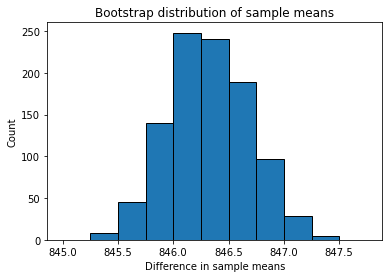

In [126]:
# Plot the distribution of the test statistic
plt.hist(bootstrap_statistic,np.arange(845,847.76,0.25),edgecolor='black')
plt.xlabel('Difference in sample means')
plt.ylabel('Count')
plt.title('Bootstrap distribution of sample means')

# Print basic statistics describing the bootstrapping distribution
print('Bootstrapping distribution mean: %.2f ' % np.mean(bootstrap_statistic))
print('Bootstrapping distribution standard deviation: %.2f ' % np.std(bootstrap_statistic))
print('Bootstrapping distribution minimum: %.2f ' % np.min(bootstrap_statistic))
print('Bootstrapping distribution maximum: %.2f ' % np.max(bootstrap_statistic))

In [127]:
#Create 95% CI from the bootstrapped distribution. The upper limit of the CI is defined as the 97.5% percentile
#and the lower limit as the 2.5% percentile of the boostrap distribution, so that 95% of the 
#distribution lies within the two limits

alpha = 0.05 # 95% confidence

CI_up = np.percentile(bootstrap_statistic, 100*(1 - alpha/2.0))
CI_lo = np.percentile(bootstrap_statistic, 100*(alpha/2.0))

print(CI_up)
print(CI_lo)

847.0243877952756
845.6143080708661


In [122]:
P_raining_avg

846.8208267716532

Since the average pressure during rain falls within the confidence interval from the bootstrapping distribution, this method agrees that the pressure is not statistically different when it rains.